# Import Libraries


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

# Read Dataset


In [180]:
my_coaster_df = pd.read_csv(
    "machine_learning_w_python/Exploratory_data_analysis/example_2/coaster_db.csv")

# Understanding Data


In [181]:
print(my_coaster_df.shape)
print(my_coaster_df.dtypes)
print(my_coaster_df.describe())
print(my_coaster_df.info())
my_coaster_df.head()

(1087, 56)
coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Repla

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


# Data Preparation


In [182]:
my_final_df = my_coaster_df[[
    'coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    # 'Type',

    'Manufacturer',
    # 'Height restriction', 'Model', 'Height',
    # 'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    # 'Track layout', 'Fastrack available', 'Soft opening date.1',
    # 'Closing date', 'Opened',
    # 'Replaced by', 'Website',
    # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    # 'Single rider line available', 'Restraint Style',
    # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',

    'year_introduced', 'latitude', 'longitude', 'Type_Main',
    'opening_date_clean',
    # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph',
    # 'height_value', 'height_unit',
    'height_ft', 'Inversions_clean', 'Gforce_clean']].copy()

In [183]:
my_final_df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [184]:
print(my_final_df.shape)
my_final_df.dtypes

(1087, 13)


coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [185]:
my_final_df["opening_date_clean"] = pd.to_datetime(
    my_final_df["opening_date_clean"])

In [186]:
print(my_final_df.shape)
my_final_df.dtypes

(1087, 13)


coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

## Column Name Cleanup


In [187]:
my_df_columns = my_final_df.columns
my_col_dict = {}
for current_column in my_df_columns:
    my_new_col = str(current_column).lower().strip()
    my_new_col = my_new_col.replace(" ", "_")

    my_col_dict[current_column] = my_new_col
my_final_df = my_final_df.rename(columns=my_col_dict)

In [188]:
my_final_df.head()

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


## Looking for Missing Values


In [189]:
my_final_df.isna().sum()

coaster_name            0
location                0
status                213
manufacturer           59
year_introduced         0
latitude              275
longitude             275
type_main               0
opening_date_clean    250
speed_mph             150
height_ft             916
inversions_clean        0
gforce_clean          725
dtype: int64

## Looking for duplicates


In [190]:
my_final_df.loc[my_final_df.duplicated()]

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean


In [191]:
my_final_df.loc[my_final_df.duplicated(subset=["coaster_name"])]

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [192]:
my_final_df.query('coaster_name == "Crystal Beach Cyclone"')

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type_main,opening_date_clean,speed_mph,height_ft,inversions_clean,gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


## Removing duplicate rows


In [193]:
my_final_df = my_final_df.loc[~my_final_df.duplicated(
    subset=["coaster_name", "location", "opening_date_clean"])].reset_index(drop=True).copy()

In [194]:
my_final_df.shape

(990, 13)

# Understanding Features [Univariate Analysis]


In [195]:
my_final_df["year_introduced"].value_counts()

year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

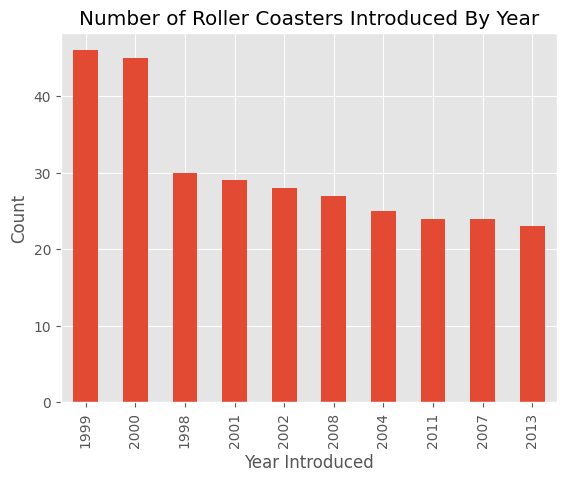

In [196]:
ax = my_final_df["year_introduced"].value_counts() \
    .head(10) \
    .plot(kind="bar", title="Number of Roller Coasters Introduced By Year")
ax.set_xlabel("Year Introduced")
ax.set_ylabel("Count")

Text(0.5, 0, 'Speed (Mph)')

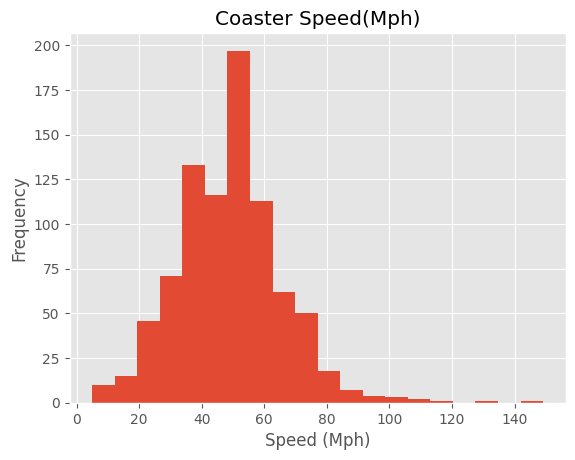

In [197]:
ax2 = my_final_df["speed_mph"].plot(
    kind="hist", bins=20, title="Coaster Speed(Mph)")
ax2.set_xlabel("Speed (Mph)")

Text(0.5, 0, 'Speed (Mph)')

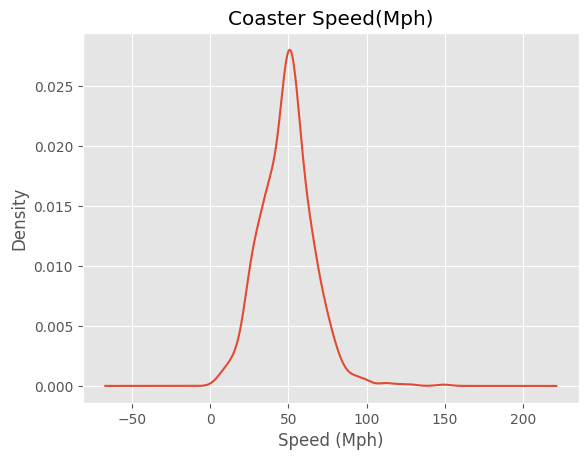

In [198]:
# kernel density plot
ax2 = my_final_df["speed_mph"].plot(
    kind="kde", title="Coaster Speed(Mph)")
ax2.set_xlabel("Speed (Mph)")

### Comparing Features


<Axes: title={'center': 'Coaster Speed vs Height'}, xlabel='speed_mph', ylabel='height_ft'>

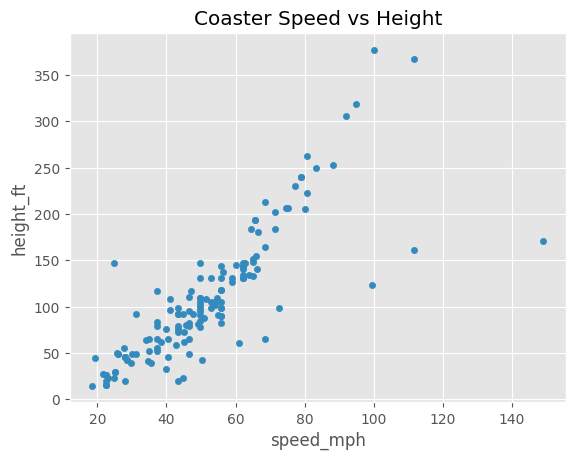

In [199]:
my_final_df.plot(kind="scatter", x="speed_mph", y="height_ft",
                 title="Coaster Speed vs Height")

<Axes: xlabel='speed_mph', ylabel='height_ft'>

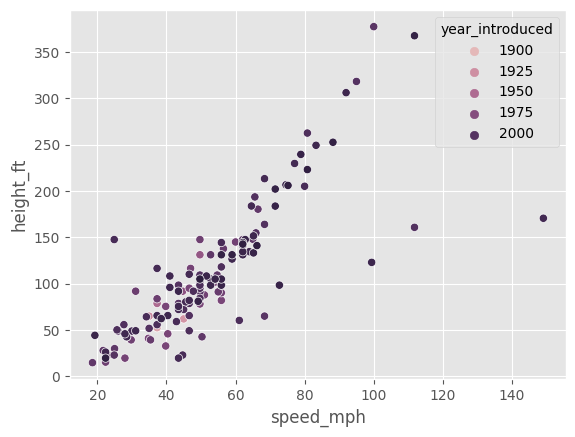

In [200]:
sns.scatterplot(x="speed_mph", y="height_ft",
                hue="year_introduced", data=my_final_df)

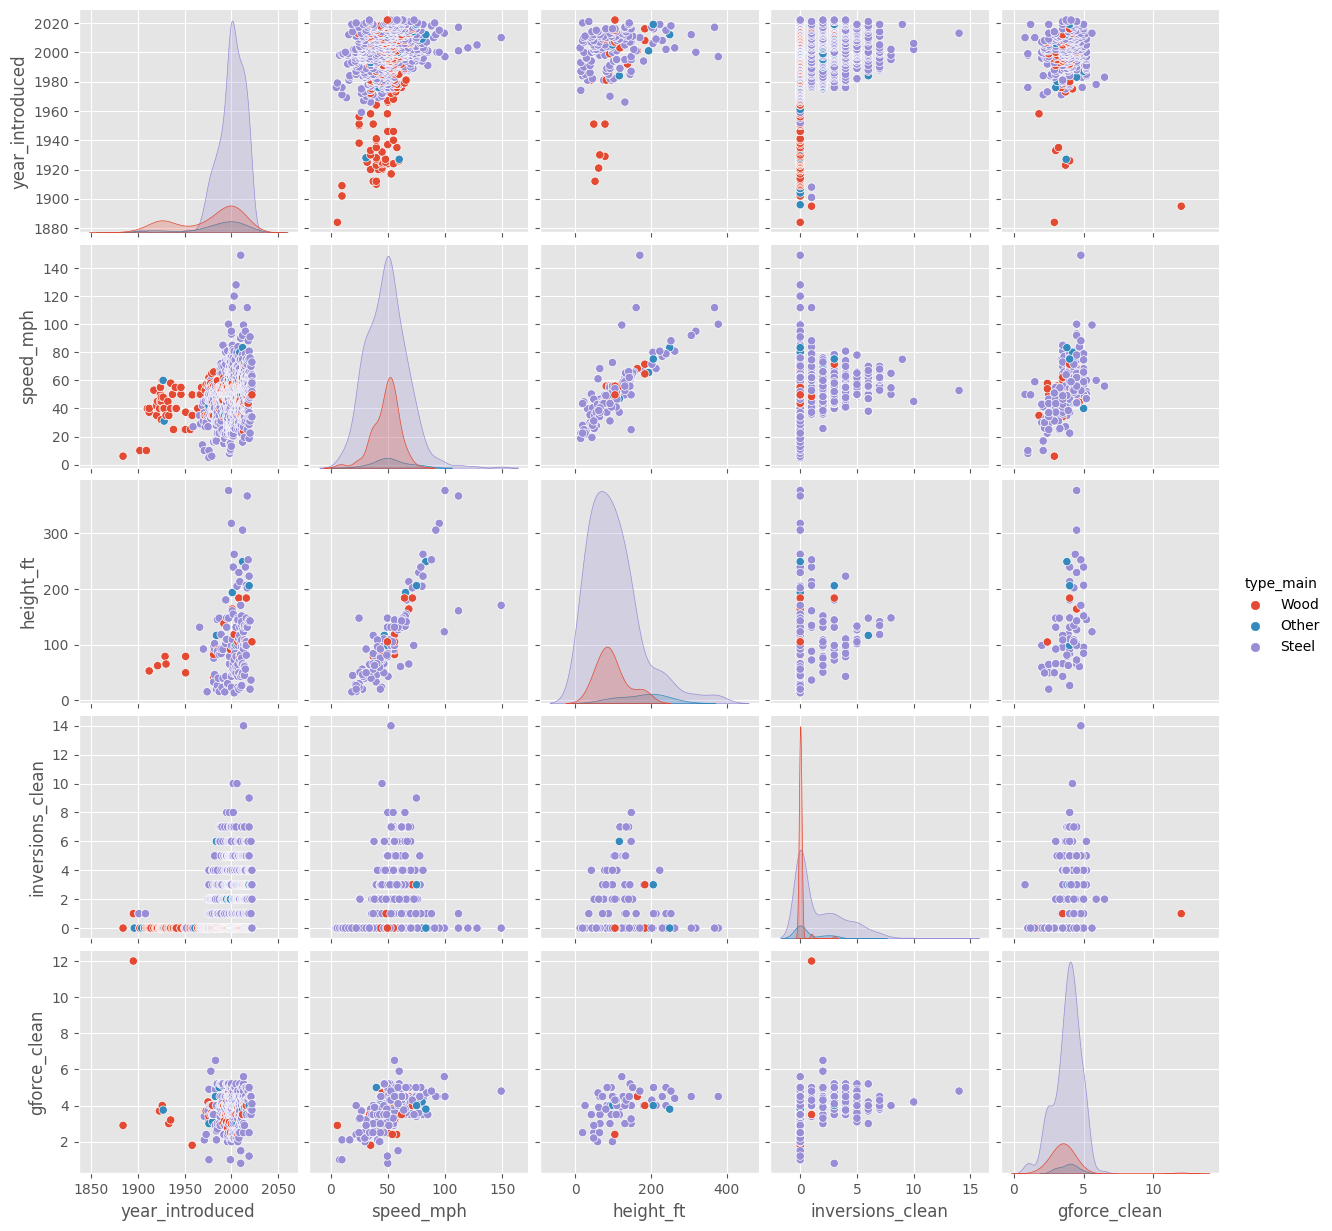

In [201]:
sns.pairplot(
    data=my_final_df,
    hue="type_main",
    vars=["year_introduced", "speed_mph", "height_ft",
          "inversions_clean", "gforce_clean"]
)
plt.show()

In [202]:
my_final_df[["year_introduced", "speed_mph", "height_ft",
             "inversions_clean", "gforce_clean"]].corr()

,year_introduced,speed_mph,height_ft,inversions_clean,gforce_clean
year_introduced,1.000000,0.225991,0.249487,0.233701,-0.073403
speed_mph,0.225991,1.000000,0.823216,0.246593,0.503828
height_ft,0.249487,0.823216,1.000000,0.138286,0.480465
inversions_clean,0.233701,0.246593,0.138286,1.000000,0.339137
gforce_clean,-0.073403,0.503828,0.480465,0.339137,1.000000


<Axes: >

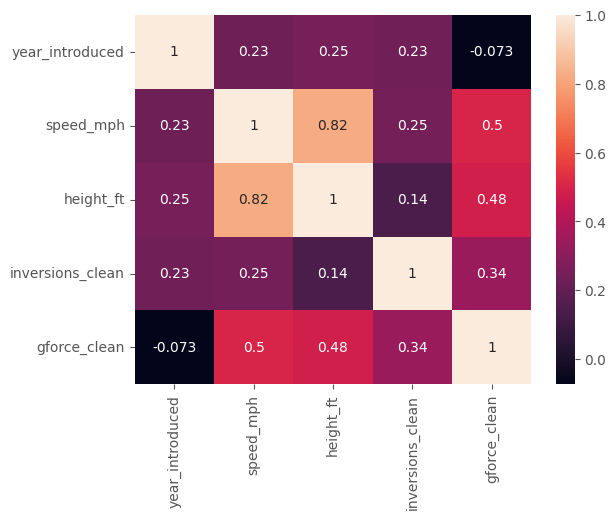

In [203]:
sns.heatmap(my_final_df[["year_introduced", "speed_mph", "height_ft",
                         "inversions_clean", "gforce_clean"]].corr(), annot=True)

# Question ?

1. What are the locations with fastest roller coasters (minimu of 10)?


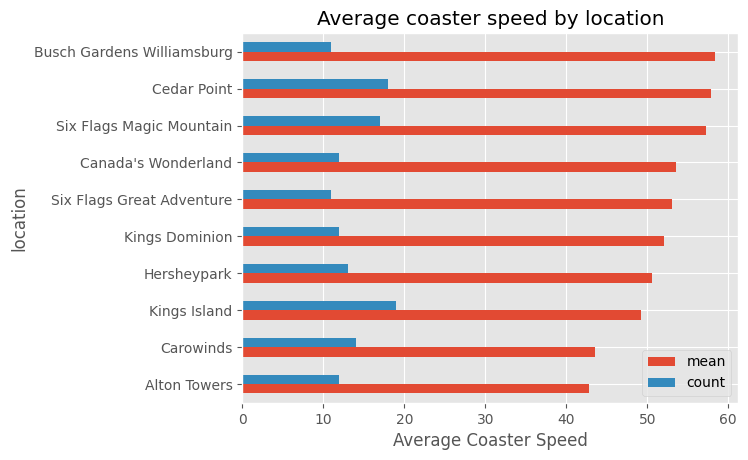

In [204]:
ax3 = my_final_df.query('location != "Other"')\
    .groupby('location')['speed_mph'] \
    .agg(['mean', 'count'])\
    .query('count >=10')\
    .sort_values('mean')\
    .plot(kind='barh', title="Average coaster speed by location")
ax3.set_xlabel("Average Coaster Speed")
plt.show()